In [1]:
from glob import glob
import os, sys

In [2]:
ndvi_images = glob("*_NDVI_MASKED.tif")

ndvi_images

['2013_NDVI_MASKED.tif',
 '2014_NDVI_MASKED.tif',
 '2015_NDVI_MASKED.tif',
 '2016_NDVI_MASKED.tif',
 '2017_NDVI_MASKED.tif',
 '2018_NDVI_MASKED.tif',
 '2019_NDVI_MASKED.tif',
 '2020_NDVI_MASKED.tif',
 '2021_NDVI_MASKED.tif',
 '2022_NDVI_MASKED.tif']

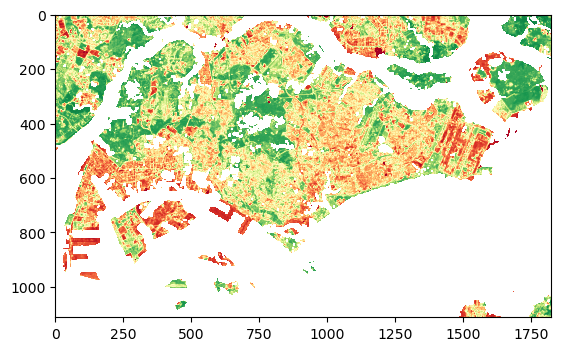

In [3]:
import rasterio as rio
from rasterio.plot import show

with rio.open(ndvi_images[-1]) as src:
    ndvi = src.read()
    profile = src.profile
    src.close()
    
show(ndvi, cmap = "RdYlGn", vmin = 0, vmax = 1);

In [4]:
import geopandas as gpd

sg_suburbs = gpd.read_file("sg_suburbs_cleaned.geojson")

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Threshold NDVI to 0.7
ndvi_threshold = ndvi < 0.5
ndvi_masked = np.ma.masked_array(ndvi, ndvi_threshold)

C:\Users\tranq\anaconda3\envs\gdal_new\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

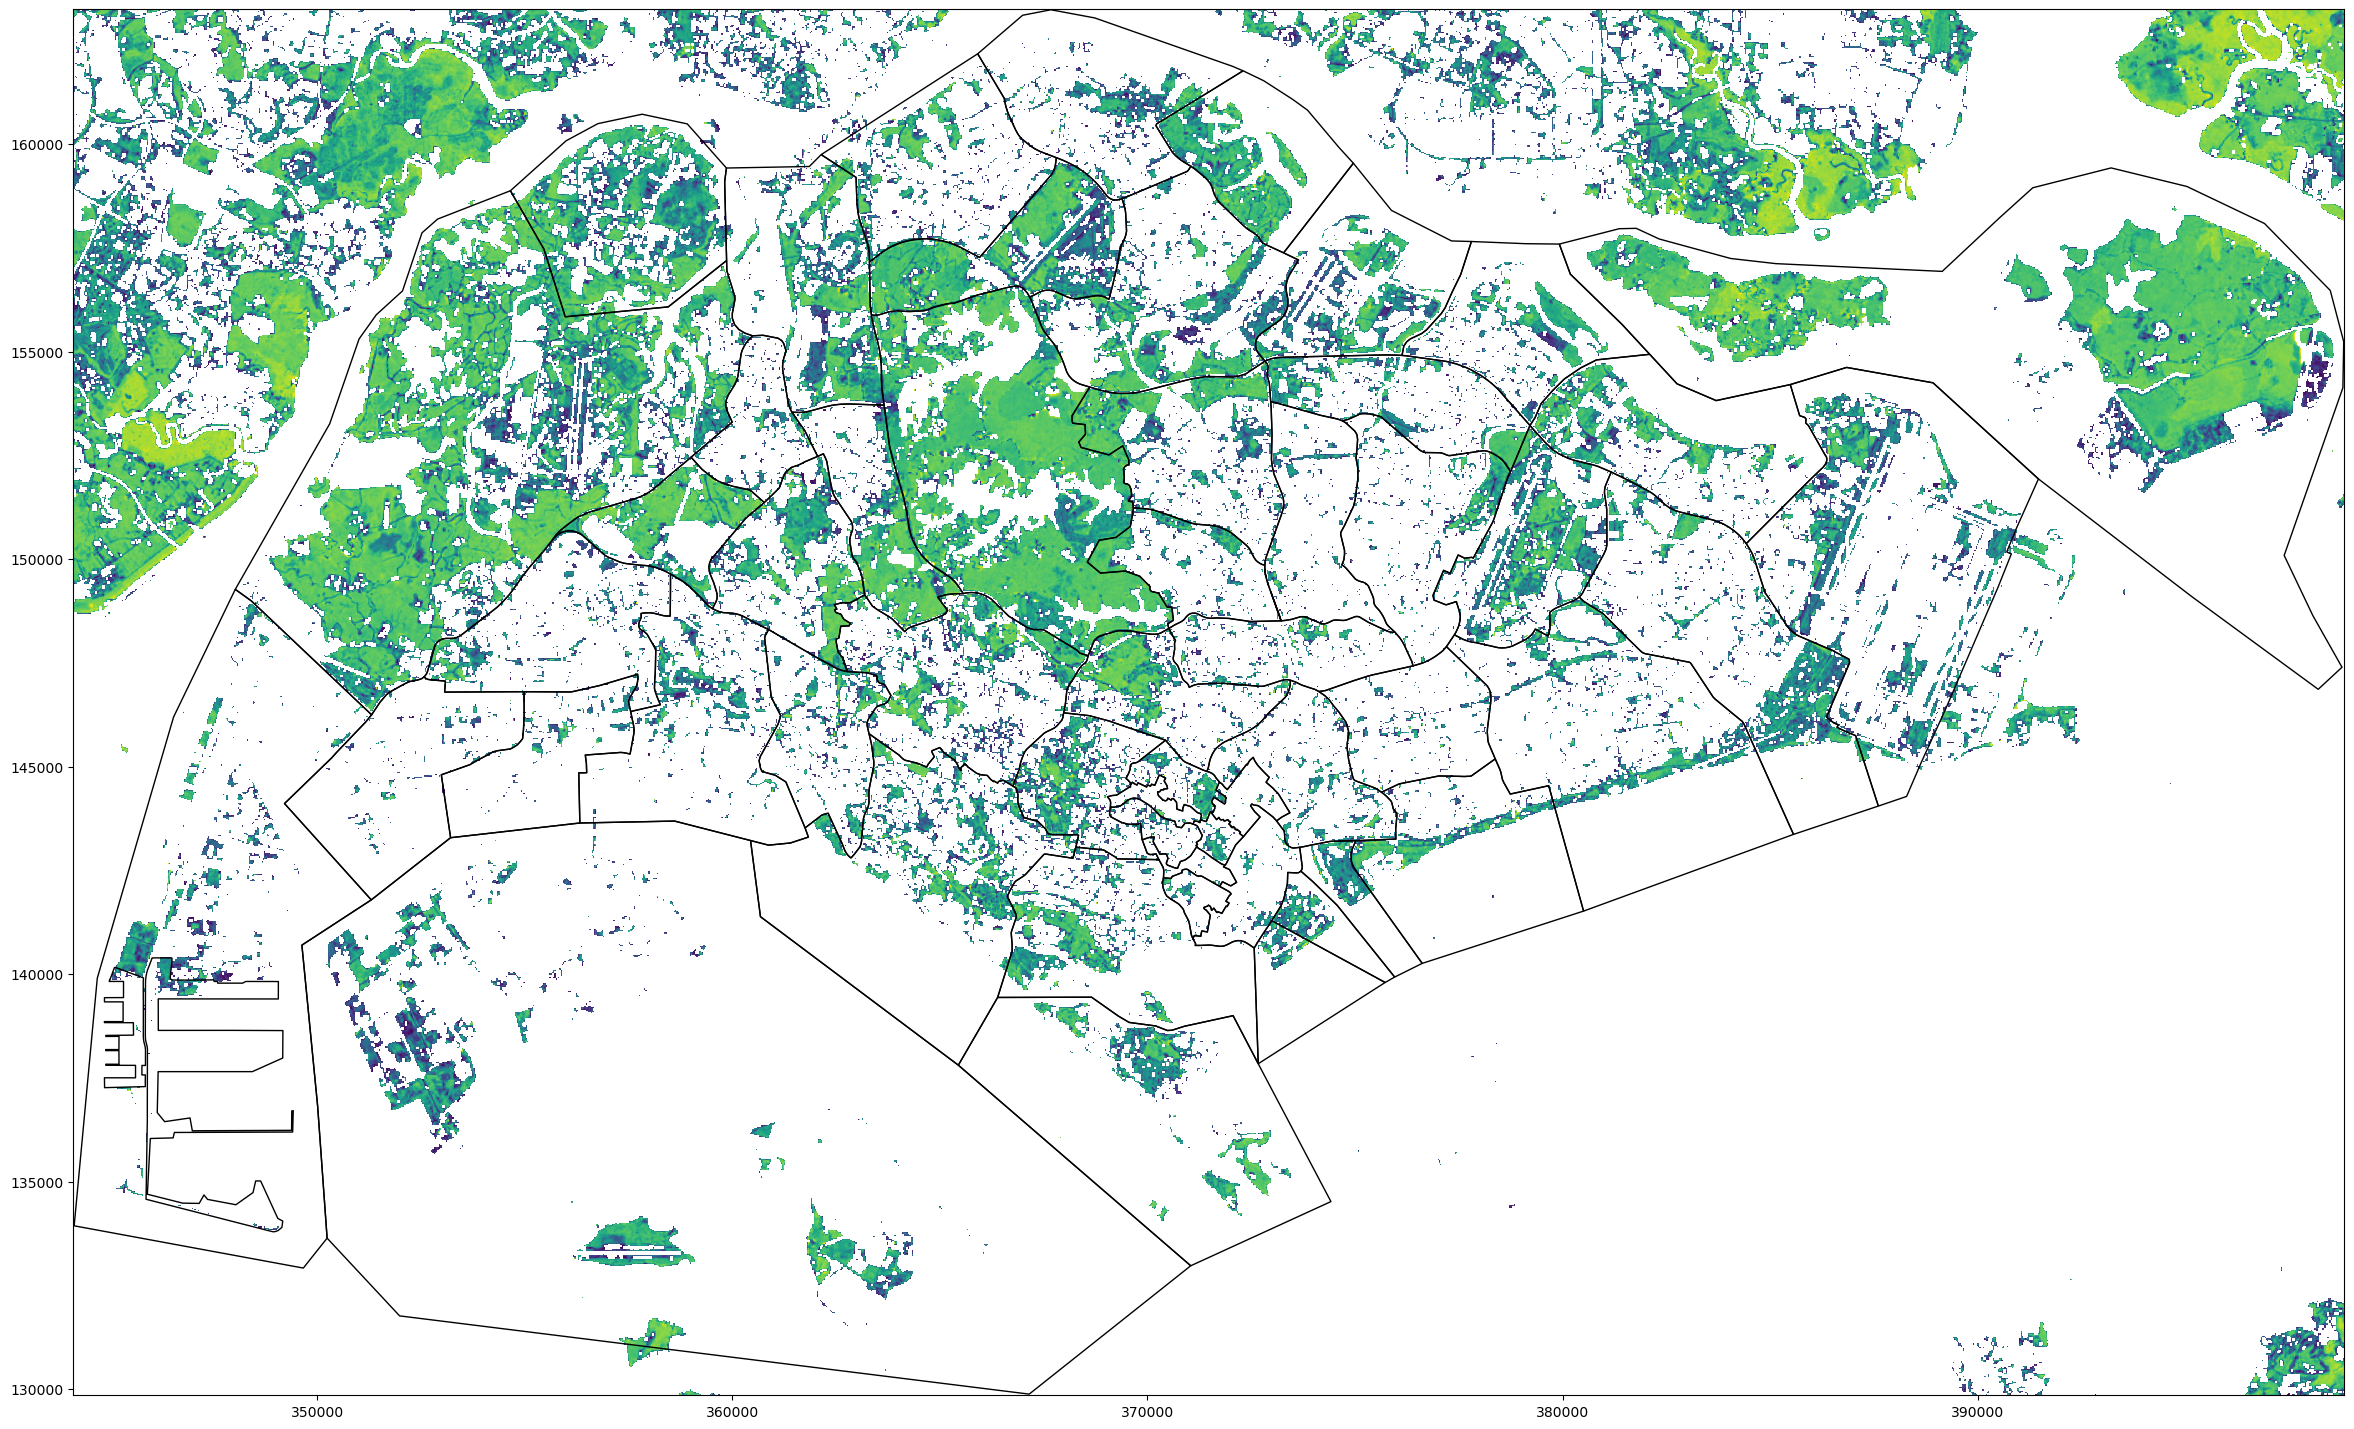

In [28]:
fig, ax = plt.subplots(figsize = (32,18))

show(ndvi_masked, transform = profile["transform"], ax = ax)
sg_suburbs.plot(ax = ax, edgecolor = "black", color = "none")

In [5]:
# calculate the proportion of each administrative region with NDVI > 0.5
with rio.open(ndvi_images[-1]) as src:
    ndvi_prop = src.read()
    profile = src.profile
    src.close()
    
ndvi_prop[ndvi_prop > 0.5] = 1
ndvi_prop[ndvi_prop < 0.5] = 0

ndvi_prop

array([[[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  0.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]]], dtype=float32)

In [10]:
import rasterstats
import pandas as pd
import numpy as np

cat_map = {0: "Urban", 1: "Healthy Vegetation"}

results = rasterstats.zonal_stats(
    "sg_suburbs_cleaned.geojson",
    ndvi_prop.squeeze(),
    nodata = np.nan,
    affine = profile["transform"],
    categorical = True,
    category_map = cat_map
)

ndvi_df = pd.DataFrame(results)
ndvi_df.head()

,Urban,Healthy Vegetation
0,3389,884
1,5017,7346
2,2773,5492
3,10483,5052
4,4206,14707


In [ ]:
ndvi_df["prop"] = ndvi_df["Healthy Vegetation"] / df.sum

C:\Users\tranq\anaconda3\envs\gdal_new\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

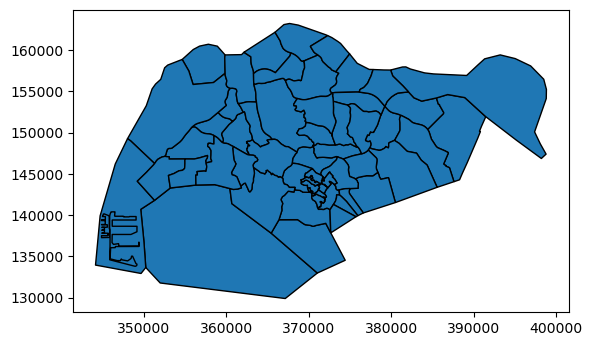

In [26]:
sg_suburbs.plot(edgecolor = "black")